In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [54]:
df = pd.read_csv("data/electricity-consumption-events.csv")

In [55]:
df.head()

,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
0,2015-12-31 21:00:00,2015-12-31 22:00:00,2016-01-01 00:00:00,2016-01-01 01:00:00,10800.0
1,2015-12-31 22:00:00,2015-12-31 23:00:00,2016-01-01 01:00:00,2016-01-01 02:00:00,10431.0
2,2015-12-31 23:00:00,2016-01-01 00:00:00,2016-01-01 02:00:00,2016-01-01 03:00:00,10005.0
3,2016-01-01 00:00:00,2016-01-01 01:00:00,2016-01-01 03:00:00,2016-01-01 04:00:00,9722.0
4,2016-01-01 01:00:00,2016-01-01 02:00:00,2016-01-01 04:00:00,2016-01-01 05:00:00,9599.0


In [56]:
df.tail()

,Start time UTC,End time UTC,Start time UTC+03:00,End time UTC+03:00,Electricity consumption in Finland
52961,2021-12-31 16:00:00,2021-12-31 17:00:00,2021-12-31 19:00:00,2021-12-31 20:00:00,11447.0
52962,2021-12-31 17:00:00,2021-12-31 18:00:00,2021-12-31 20:00:00,2021-12-31 21:00:00,11237.0
52963,2021-12-31 18:00:00,2021-12-31 19:00:00,2021-12-31 21:00:00,2021-12-31 22:00:00,10914.0
52964,2021-12-31 19:00:00,2021-12-31 20:00:00,2021-12-31 22:00:00,2021-12-31 23:00:00,10599.0
52965,2021-12-31 20:00:00,2021-12-31 21:00:00,2021-12-31 23:00:00,2022-01-01 00:00:00,10812.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52966 entries, 0 to 52965
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Start time UTC                      52966 non-null  object 
 1   End time UTC                        52966 non-null  object 
 2   Start time UTC+03:00                52966 non-null  object 
 3   End time UTC+03:00                  52966 non-null  object 
 4   Electricity consumption in Finland  52966 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.0+ MB


In [58]:
df.describe()

,Electricity consumption in Finland
count,52966.000000
mean,9488.750519
std,1576.241673
min,5341.000000
25%,8322.000000
50%,9277.000000
75%,10602.000000
max,15105.000000


In [59]:
df.axes

[RangeIndex(start=0, stop=52966, step=1),
 Index(['Start time UTC', 'End time UTC', 'Start time UTC+03:00',
        'End time UTC+03:00', 'Electricity consumption in Finland'],
       dtype='object')]

In [60]:
for it in (
    "Start time UTC",
    "End time UTC",
    "Start time UTC+03:00",
):
    df.drop(it, axis=1, inplace=True)

df.rename(
    columns={
        "End time UTC+03:00": "DateTime",
        "Electricity consumption in Finland": "Consumption",
    },
    inplace=True,
)

df.head(5)

,DateTime,Consumption
0,2016-01-01 01:00:00,10800.0
1,2016-01-01 02:00:00,10431.0
2,2016-01-01 03:00:00,10005.0
3,2016-01-01 04:00:00,9722.0
4,2016-01-01 05:00:00,9599.0


In [61]:
dataset = df
dataset["Month"] = pd.to_datetime(df["DateTime"]).dt.month
dataset["Year"] = pd.to_datetime(df["DateTime"]).dt.year
dataset["Date"] = pd.to_datetime(df["DateTime"]).dt.date
dataset["Time"] = pd.to_datetime(df["DateTime"]).dt.time
dataset["Day"] = pd.to_datetime(df["DateTime"]).dt.day_name()
dataset = df.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

In [62]:
dataset.head()

,Consumption,Month,Year,Date,Time,Day
DateTime,,,,,,
2016-01-01 01:00:00,10800.0,1,2016,2016-01-01,01:00:00,Friday
2016-01-01 02:00:00,10431.0,1,2016,2016-01-01,02:00:00,Friday
2016-01-01 03:00:00,10005.0,1,2016,2016-01-01,03:00:00,Friday
2016-01-01 04:00:00,9722.0,1,2016,2016-01-01,04:00:00,Friday
2016-01-01 05:00:00,9599.0,1,2016,2016-01-01,05:00:00,Friday


In [63]:
print(f"Total Number of Years: {dataset.Year.nunique()}")
dataset.Year.unique()

Total Number of Years: 7


array([2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int32)

In [64]:
dataset = dataset[71:-121]
dataset.tail()

,Consumption,Month,Year,Date,Time,Day
DateTime,,,,,,
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,Sunday
2021-12-26 22:00:00,12384.0,12,2021,2021-12-26,22:00:00,Sunday
2021-12-26 23:00:00,12044.0,12,2021,2021-12-26,23:00:00,Sunday


DATA VISUALIZATION

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


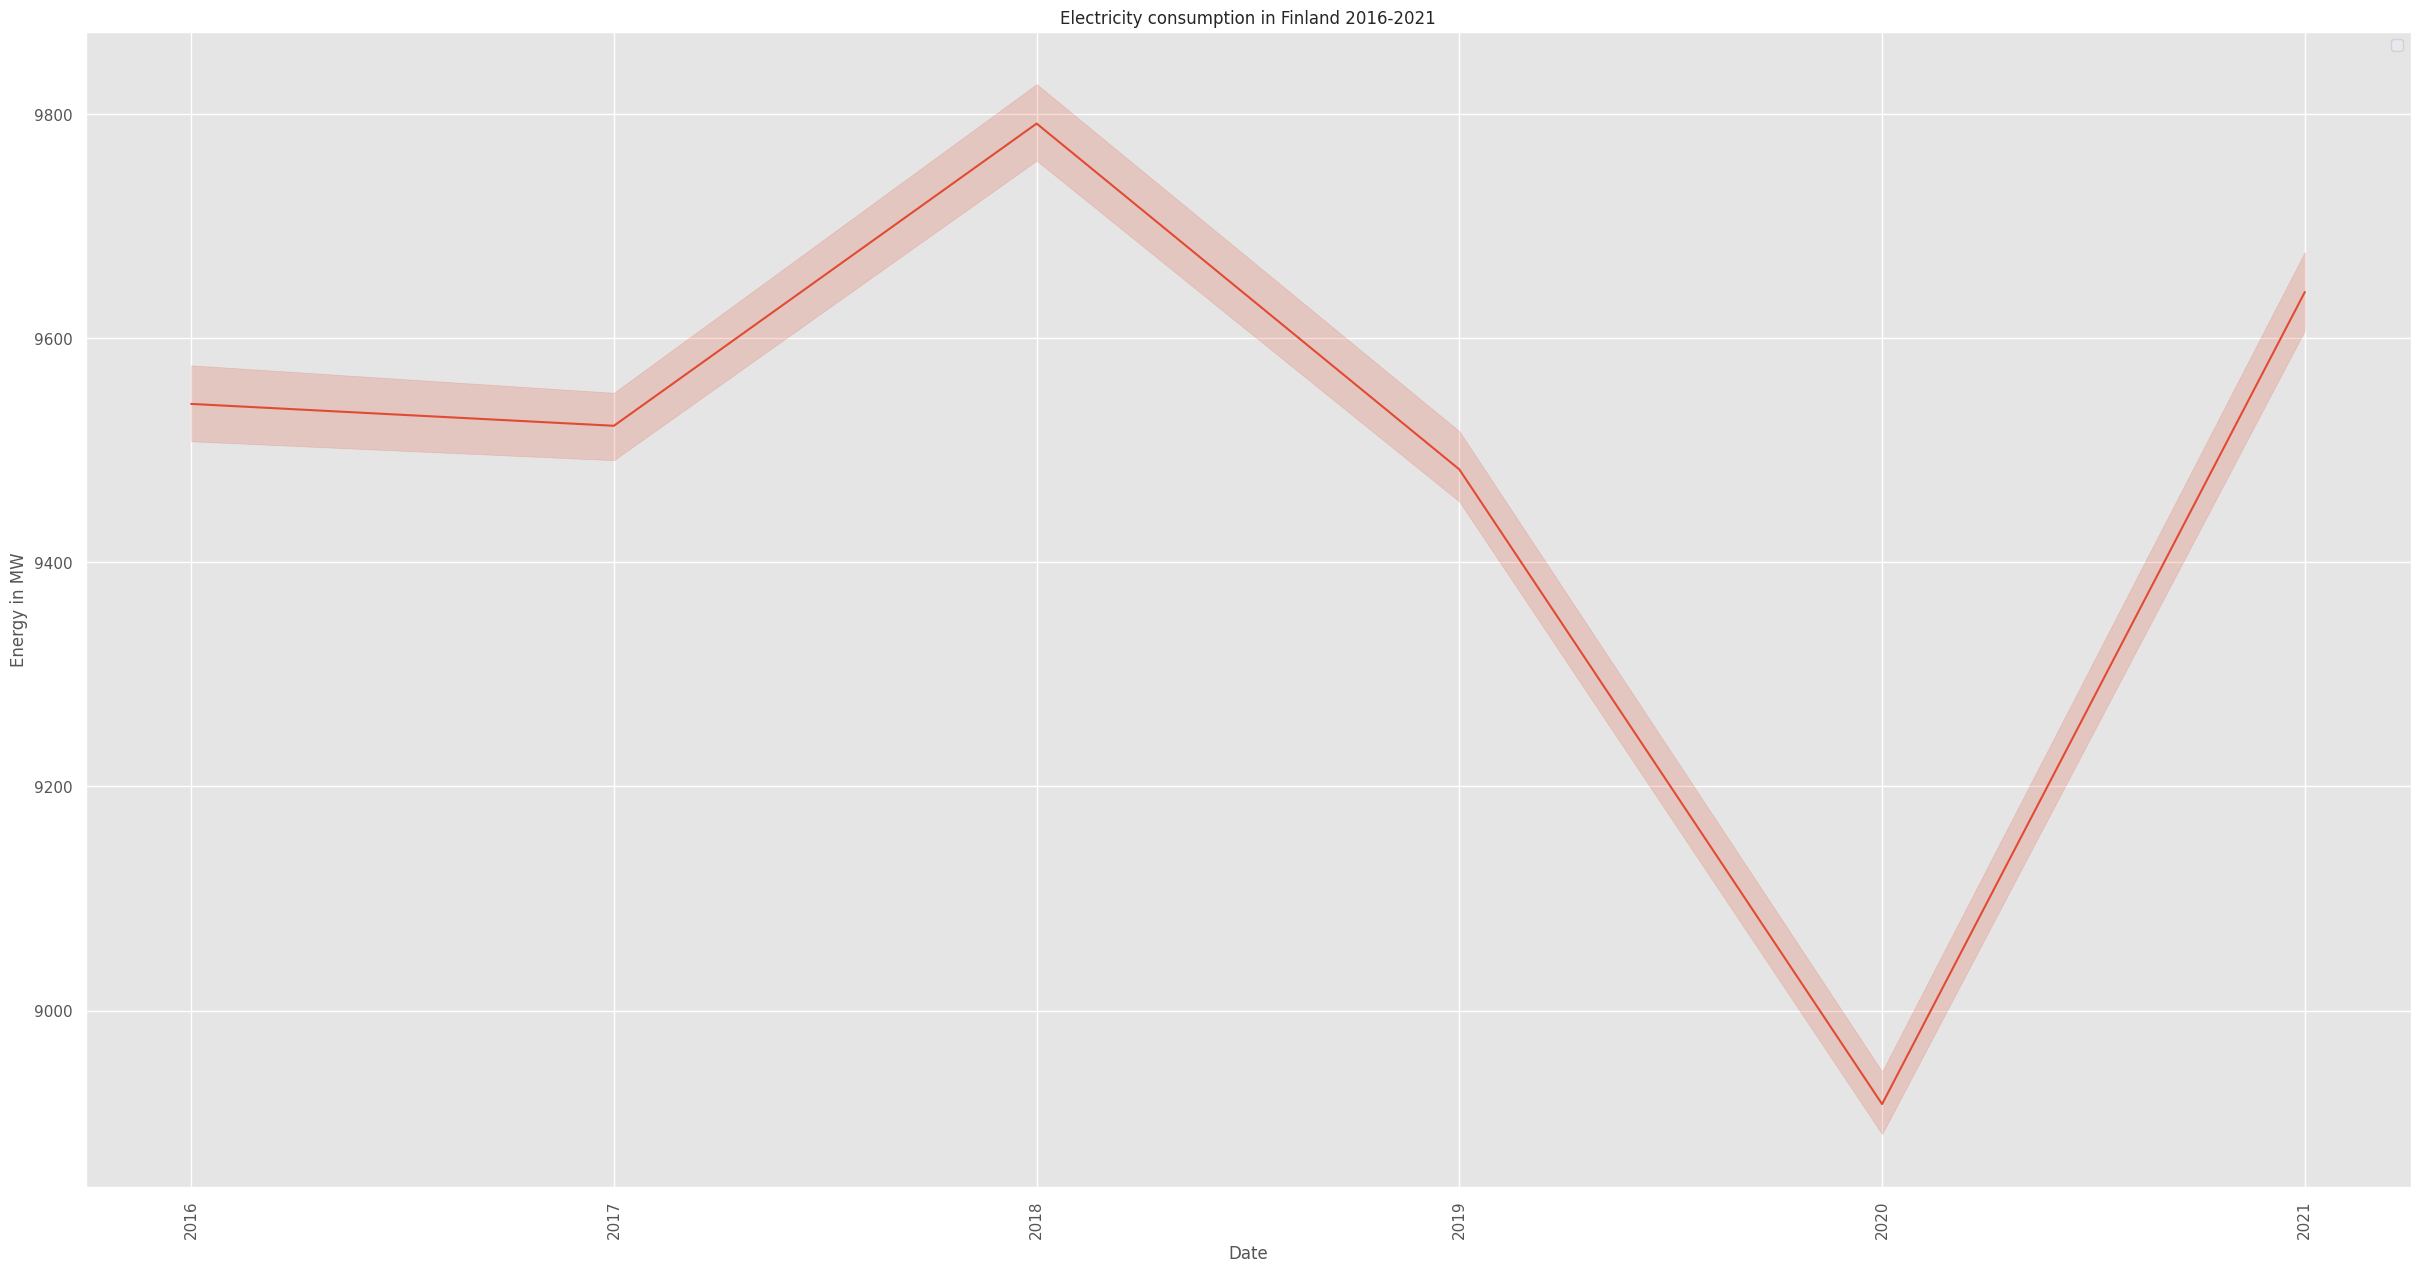

In [65]:
fig = plt.figure()
axes1 = plt.subplot2grid((1, 1), (0, 0))

style.use("ggplot")
sns.lineplot(x=dataset["Year"], y=dataset["Consumption"], data=dataset)
sns.set(rc={"figure.figsize": (20, 10)})

plt.title("Electricity consumption in Finland 2016-2021")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in axes1.xaxis.get_ticklabels():
    label.set_rotation(90)

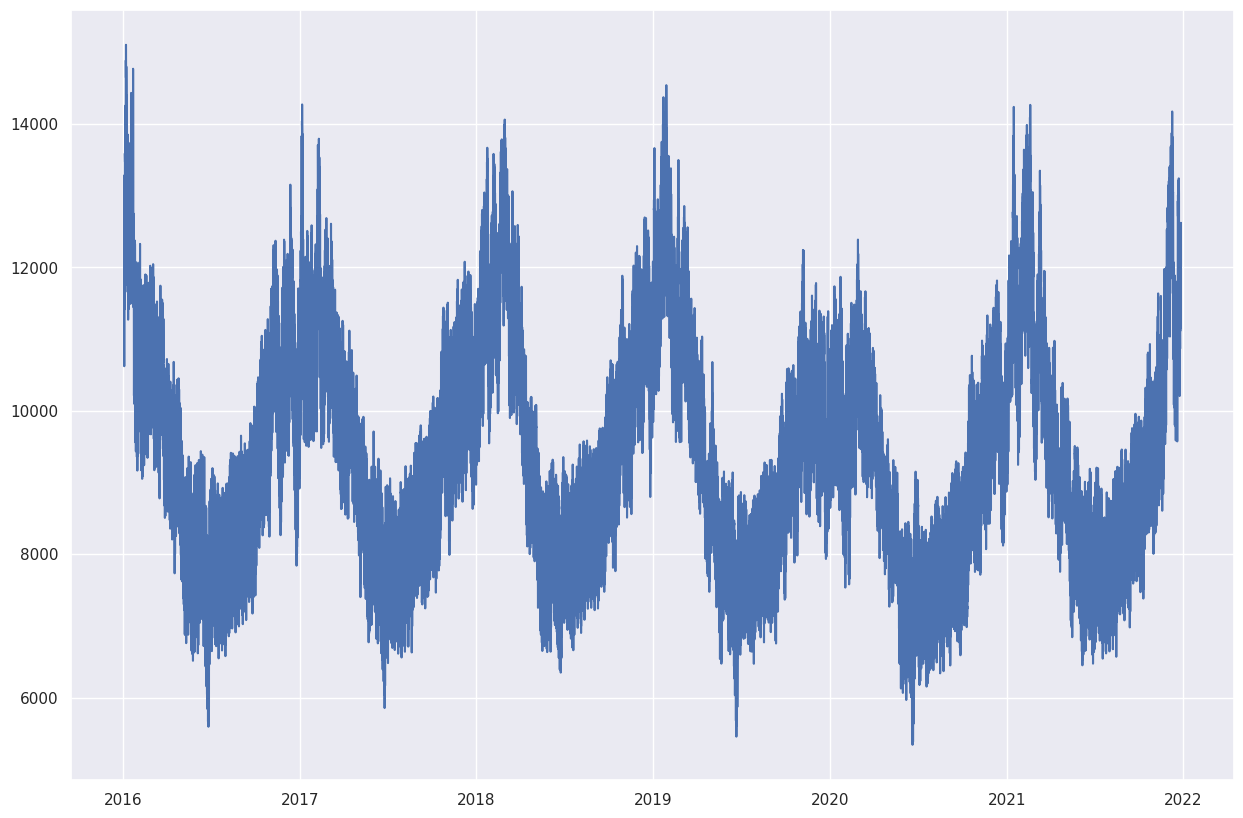

In [66]:
plt.figure(figsize=(15, 10))
plt.plot(dataset["Consumption"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


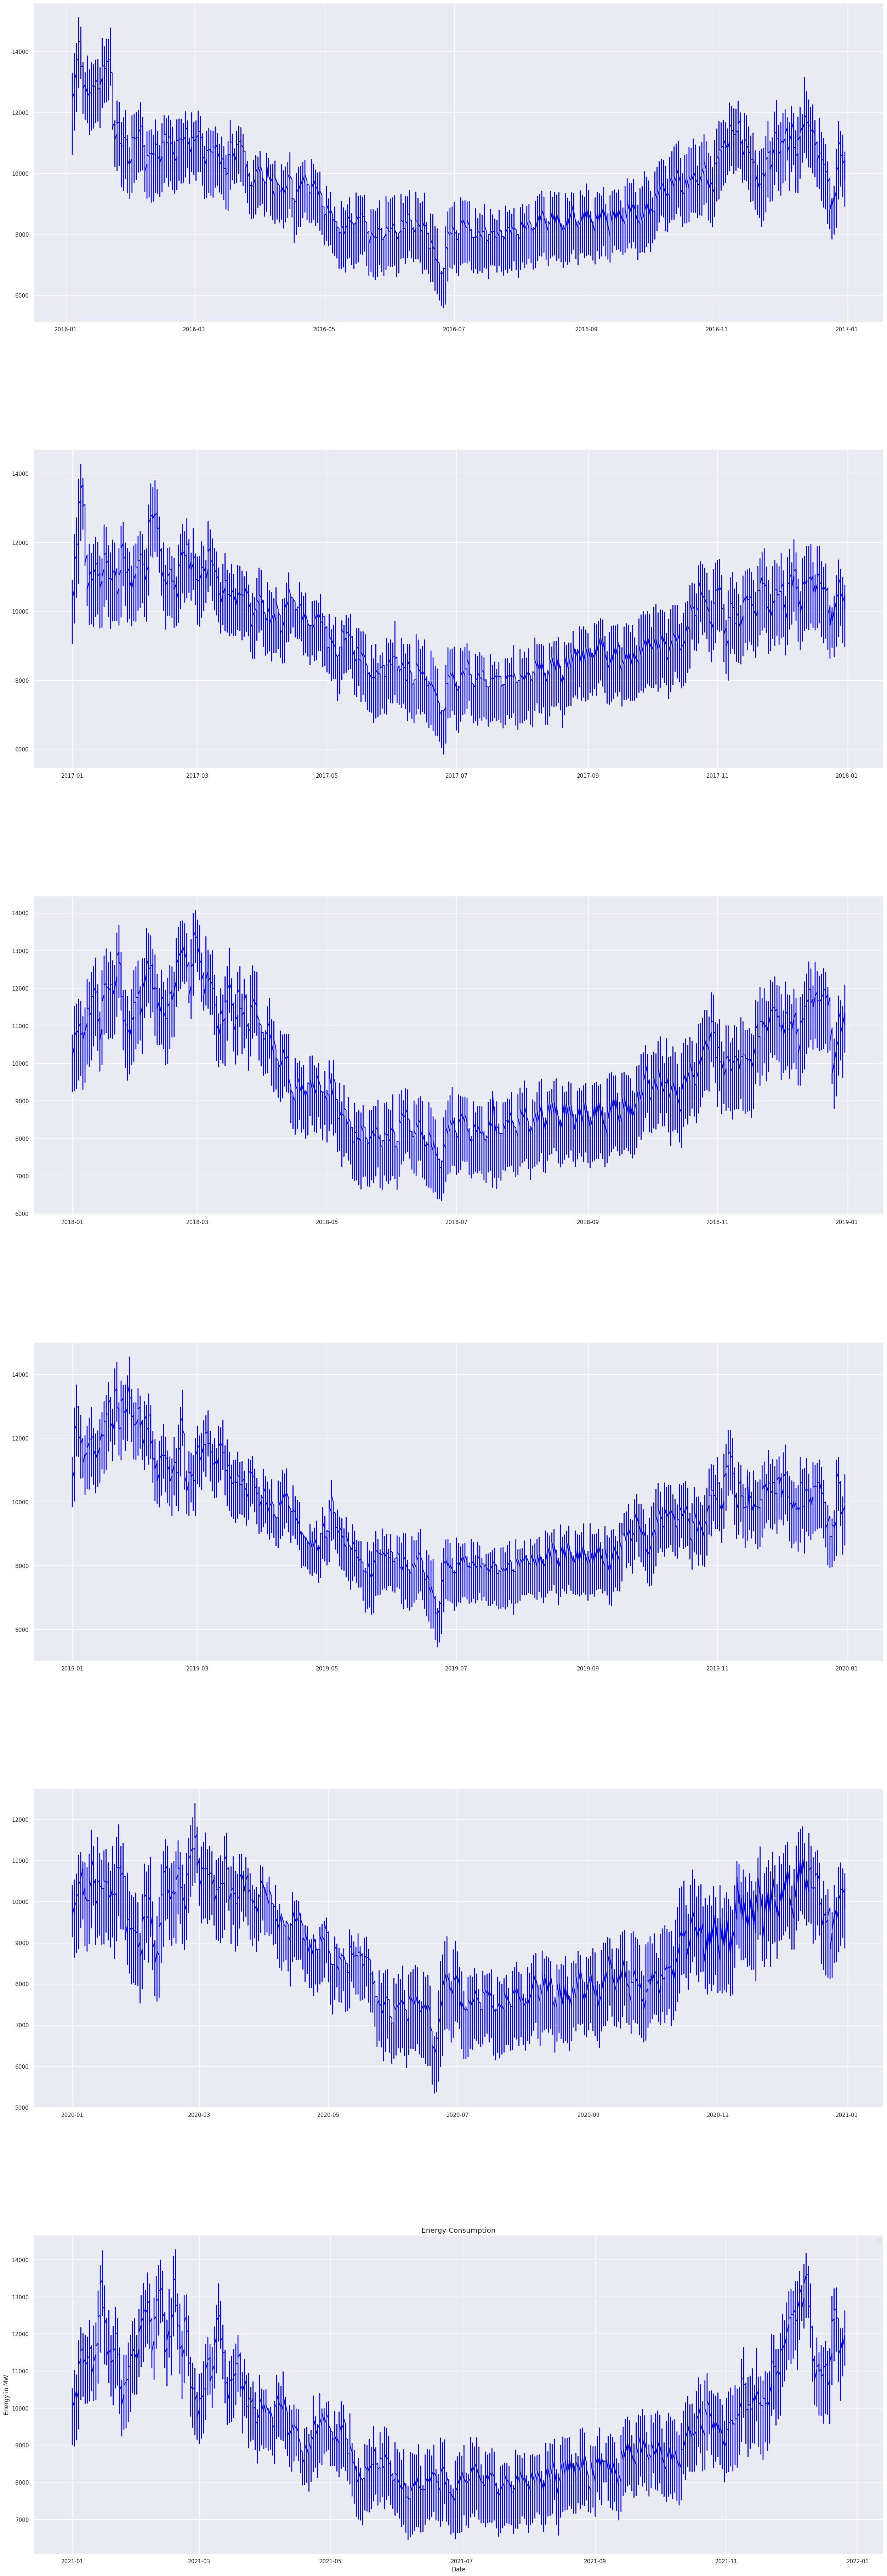

In [67]:
# Energy Consumption Each Year

fig = plt.figure(figsize=(30, 30))

ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)

style.use("ggplot")

y_2016 = dataset.loc["2016"]["Consumption"].to_list()
x_2016 = dataset.loc["2016"]["Date"].to_list()
ax1.plot(x_2016, y_2016, color="blue", linewidth=1.7)

y_2017 = dataset.loc["2017"]["Consumption"].to_list()
x_2017 = dataset.loc["2017"]["Date"].to_list()
ax2.plot(x_2017, y_2017, color="blue", linewidth=1.7)

y_2018 = dataset.loc["2018"]["Consumption"].to_list()
x_2018 = dataset.loc["2018"]["Date"].to_list()
ax3.plot(x_2018, y_2018, color="blue", linewidth=1.7)

y_2019 = dataset.loc["2019"]["Consumption"].to_list()
x_2019 = dataset.loc["2019"]["Date"].to_list()
ax4.plot(x_2019, y_2019, color="blue", linewidth=1.7)

y_2020 = dataset.loc["2020"]["Consumption"].to_list()
x_2020 = dataset.loc["2020"]["Date"].to_list()
ax5.plot(x_2020, y_2020, color="blue", linewidth=1.7)

y_2021 = dataset.loc["2021"]["Consumption"].to_list()
x_2021 = dataset.loc["2021"]["Date"].to_list()
ax6.plot(x_2021, y_2021, color="blue", linewidth=1.7)

plt.rcParams["figure.figsize"] = (30, 15)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=2.5, wspace=0.4, hspace=0.4)
plt.title("Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
plt.legend()

/tmp/ipykernel_192066/1988304943.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Consumption"])


Text(0.5, 1.0, 'Energy Distribution')

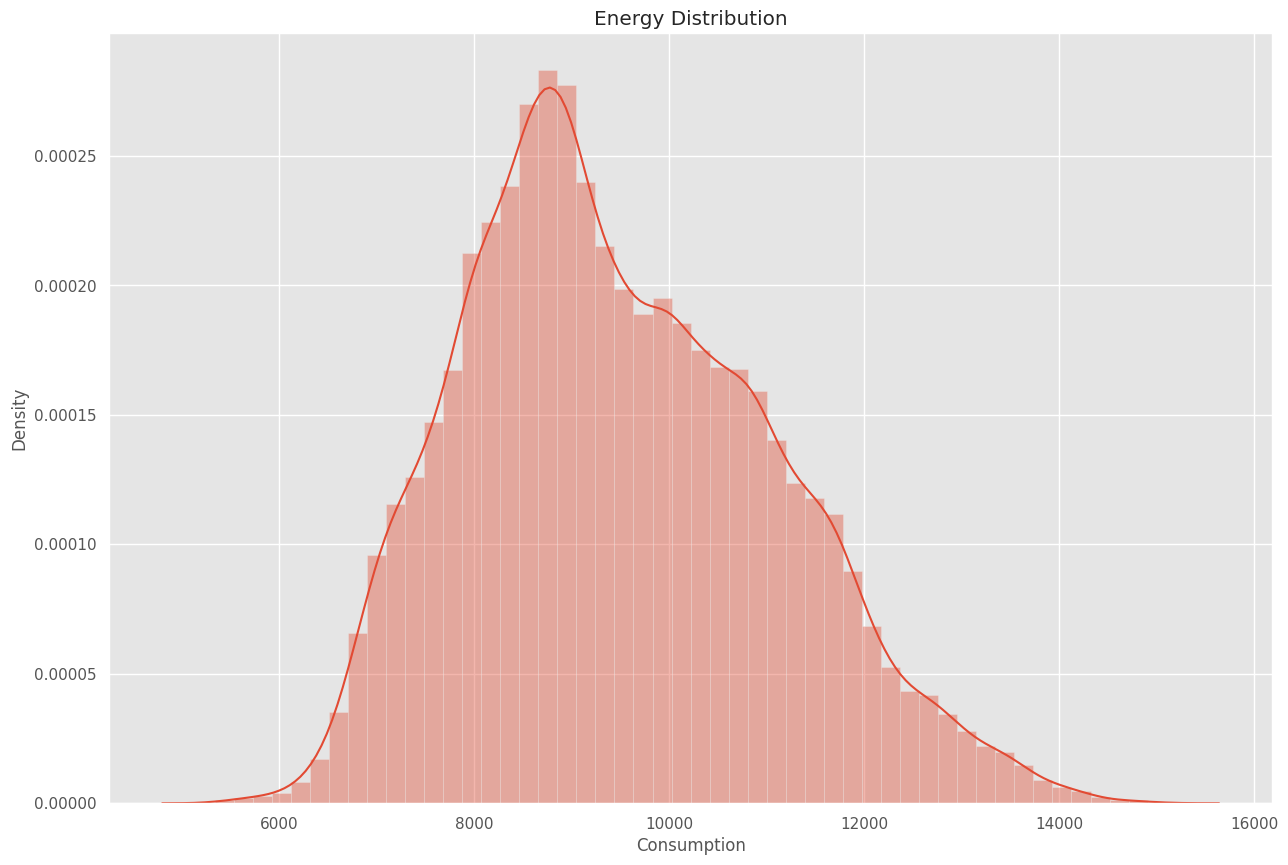

In [71]:
fig = plt.figure(figsize=(15, 10))
sns.distplot(dataset["Consumption"])
plt.title("Energy Distribution")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


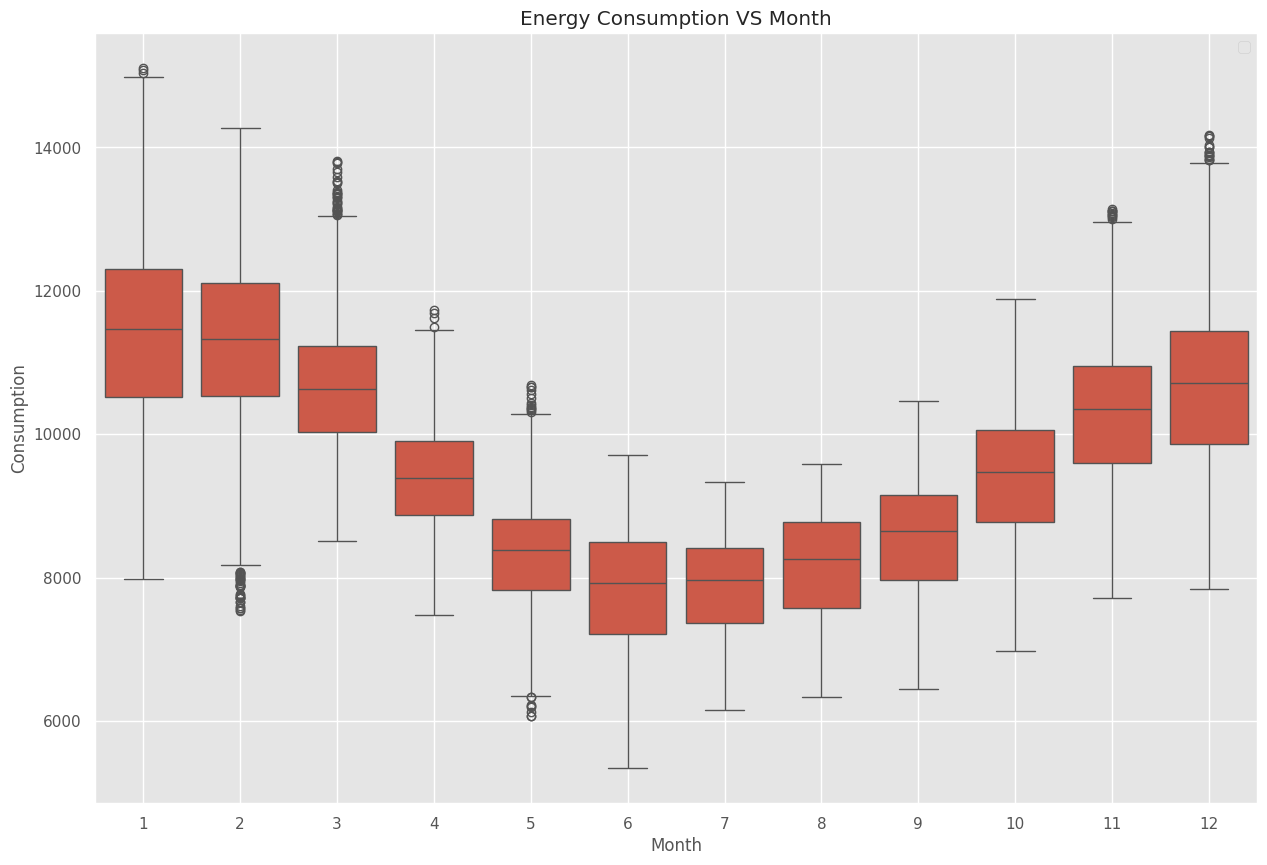

In [72]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x=dataset["Month"], y=dataset["Consumption"], data=df)
plt.title("Energy Consumption VS Month")
plt.xlabel("Month")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [73]:
dataset1 = dataset
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x=dataset1.index.hour, y=dataset1.Consumption, data=df)
plt.title("Energy Consumption VS Hour")
plt.xlabel("Hour")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 52966 and the vector passed to `x` has length 52774.

<Figure size 1500x1000 with 0 Axes>

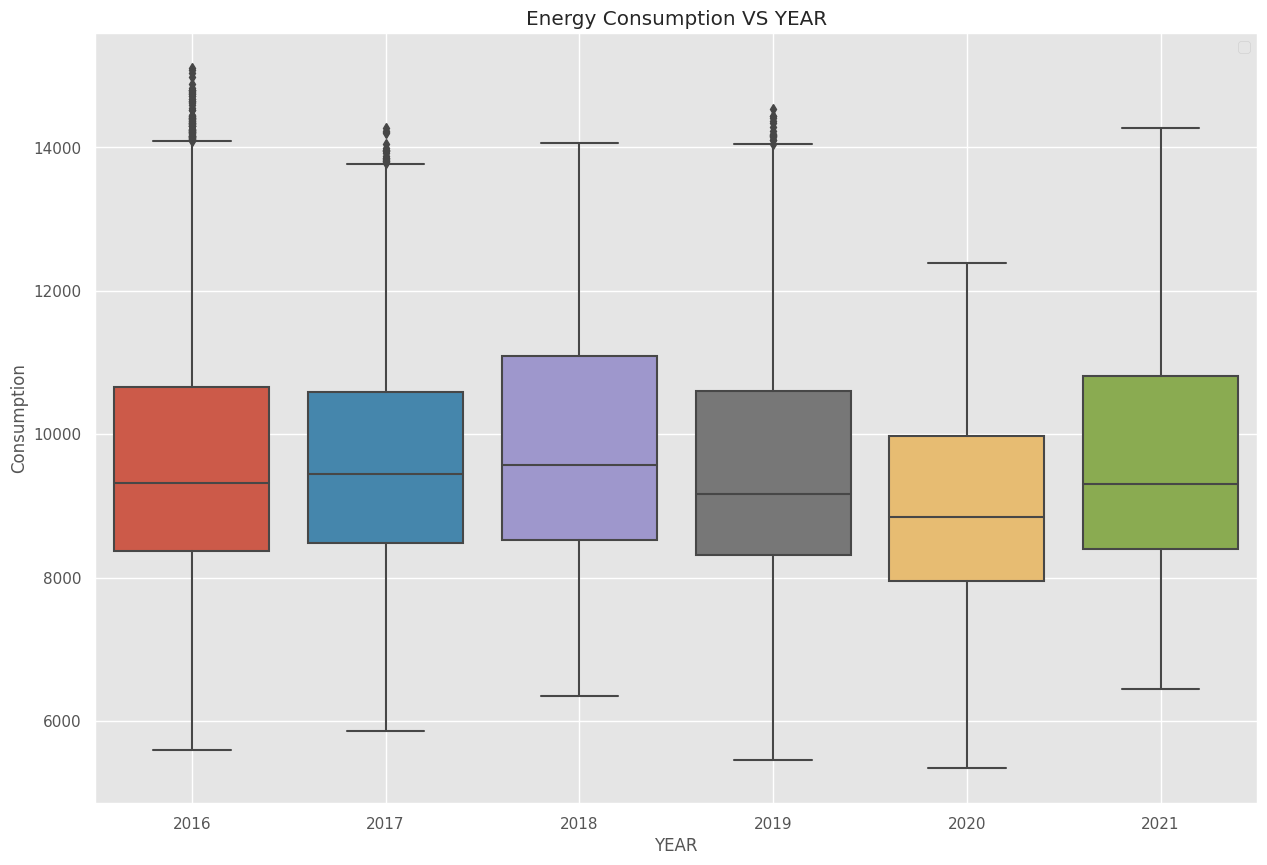

In [ ]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(x=dataset1.index.year, y=dataset1.Consumption, data=df)
plt.title("Energy Consumption VS YEAR")
plt.xlabel("YEAR")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

LSTM MODEL

In [ ]:
# Downsampling involves decreasing the time-frequency of the data
# Downsapling the time-frequency from hours to days
newDataSet = dataset.resample("D").mean()

In [ ]:
# We have 2193 row
# 2193 - 3 - 6 = 2184 row after omit first two rows and last six ones.
# 2184 / 7 = 312 week
# 312 * 80 %  250 week for train (1750 day)
# 312 - 250 = 62 week for test (434 day)
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

In [ ]:
newDataSet.head()

In [ ]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

In [ ]:
# Normalize data before model fitting
# it will boost the performance( in neural networks) + transform
from sklearn.preprocessing import MinMaxScaler

# scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1, 1))
print("Normalizing data before model fitting")
print(y[:10])

In [ ]:
training_size = int(len(y) * 0.80)
test_size = len(y) - training_size
val_size = int(training_size * 0.20)
train_data, test_data, val_data = (
    y[0 : training_size - val_size, :],
    y[training_size : len(y), :1],
    y[len(y) - test_size - val_size : len(y) - test_size, :1],
)

In [ ]:
# building input variable
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i : (i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("X_val shape: ", X_val.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units=50))
# model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compiling the RNN
model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
model.summary()

In [ ]:
history = model.fit(
    X_train, y_train, validation_data=(X_val, yval), verbose=1, epochs=60, batch_size=20
)

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(history.history["loss"])  # tb
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [ ]:
import tensorflow as tf

tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
val_predict = model.predict(X_val)

In [ ]:
##Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
val_predict = scaler.inverse_transform(val_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

In [ ]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)

In [ ]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

In [ ]:
plt.figure(figsize=(20, 10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y)
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(["actual", "train_predictions"])
plt.xlabel("Time Steps")
plt.ylabel("Consumption MWh")
plt.show()

In [ ]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions = scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results

In [ ]:
plt.figure(figsize=(20, 10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(["actual_val", "Val_predictions"])
plt.xlabel("Time Steps")
plt.ylabel("Consumption MWh")

In [ ]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

In [ ]:
plt.figure(figsize=(20, 10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(["Actual_test", "Test_predictions"])
plt.xlabel("Time Steps")
plt.ylabel("Consumption MWh")

In [ ]:
### Plotting
# shift train predictions for plotting
look_back = 100  # *****************************************>>>>>100
fig, ax = plt.subplots(figsize=(20, 10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 + 349 : len(y) - 1, :] = (
    test_predict
)
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["inverse_transform(y)", "trainPredictPlot", "testPredictPlot"])
plt.xlabel("Time Steps")
plt.ylabel("Consumption MWh")
plt.show()

In [ ]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input = test_data[337:].reshape(1, -1)
print(x_input.shape)
# print(x_input[0])
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
# print(temp_input)

In [ ]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
test = ""
while i < 30:
    if len(temp_input) > 100:
        test = "if"
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        test = "else"
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1


print(test)
print(len(lst_output))

In [ ]:
df3 = y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15, 10))
plt.plot(df3[2000:])